In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam

### Prepare MINIST dataset:

In [17]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape data for an MLP input
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))

# Normalize data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [64]:
# clip noise with dataset
noise_factor = 0.4
x_train_noisy = train_images + noise_factor * np.random.normal(size=train_images.shape) 
x_test_noisy = test_images + noise_factor * np.random.normal(size=test_images.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)
print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 784)
(10000, 784)


# Types of autoencoders

## 1. Deep autoencoder:

### Compile, Train the model and moniter the loss function:

In [21]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(train_images, train_images, epochs=5, batch_size=64, shuffle=True, validation_data=(test_images, test_images))

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1578 - val_loss: 0.1122
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1054 - val_loss: 0.0993
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0973 - val_loss: 0.0937
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0935 - val_loss: 0.0915
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0914 - val_loss: 0.0897


313/313 [==============================] - 1s 3ms/step


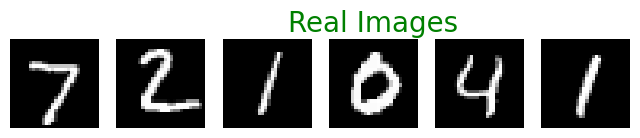

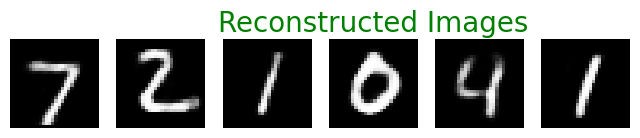

In [56]:
# Real image
n = 6
reconstructed_images = autoencoder.predict(test_images)

plt.figure(figsize=(8, 5))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  if(i == 3):
        plt.title('Real Images', fontsize = 20, color = 'Green')
  plt.imshow(test_images[i].reshape(28, 28))
  ax.axis('off')
plt.show()

# Testing the model by reconstructing image

plt.figure(figsize=(8, 5))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  if(i == 3):
        plt.title('Reconstructed Images', fontsize = 20, color = 'Green')
  plt.imshow(reconstructed_images[i].reshape(28, 28))
  ax.axis('off')

plt.show()

## 2. Denoising autoencoder:
### Compile, Train the model and moniter the loss function:

In [65]:
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1629
Epoch 2/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1258
Epoch 3/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1184


313/313 [==============================] - 1s 3ms/step


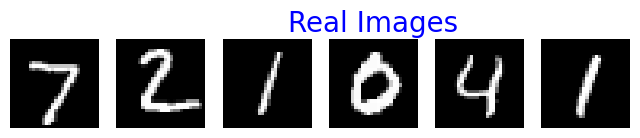

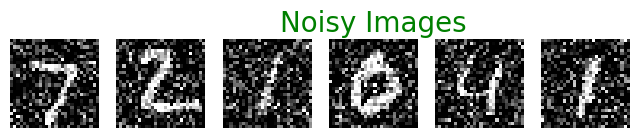

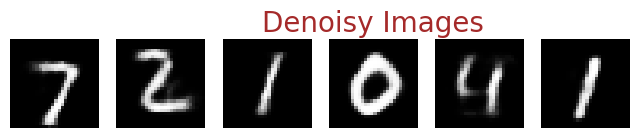

In [70]:
n = 6
denoise_images = autoencoder.predict(x_test_noisy)

# Real image
plt.figure(figsize=(8, 5))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  if(i == 3):
        plt.title('Real Images', fontsize = 20, color = 'Blue')
  plt.imshow(test_images[i].reshape(28, 28))
  ax.axis('off')
plt.show()

# Noisy image
plt.figure(figsize=(8, 5))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  if(i == 3):
        plt.title('Noisy Images', fontsize = 20, color = 'Green')
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  ax.axis('off')
plt.show()

# Testing the model by reconstructing image
plt.figure(figsize=(8, 5))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  if(i == 3):
        plt.title('Denoisy Images', fontsize = 20, color = 'Brown')
  plt.imshow(denoise_images[i].reshape(28, 28))
  ax.axis('off')

plt.show()

## 3. Sparse autoencoder:
### Compile, Train the model and moniter the loss function:

In [73]:
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu',activity_regularizer=l1(10e-6))(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder_regularized = Model(input_img, output_img)
autoencoder_regularized.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_regularized.fit(x_train, x_train, epochs=3)

encoded_regularized = Model(input_img, code)

Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1374
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0994
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0933


313/313 [==============================] - 1s 3ms/step


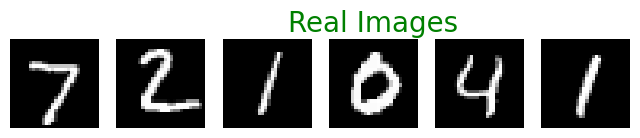

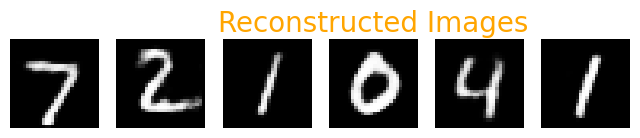

In [75]:
# Real image
n = 6
reconstructed_images = autoencoder_regularized.predict(test_images)

plt.figure(figsize=(8, 5))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  if(i == 3):
        plt.title('Real Images', fontsize = 20, color = 'Green')
  plt.imshow(test_images[i].reshape(28, 28))
  ax.axis('off')
plt.show()

# Testing the model by reconstructing image

plt.figure(figsize=(8, 5))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  if(i == 3):
        plt.title('Reconstructed Images', fontsize = 20, color = 'Orange')
  plt.imshow(reconstructed_images[i].reshape(28, 28))
  ax.axis('off')

plt.show()

## 4. Shallow autoencoder:
### Compile, Train the model and moniter the loss function:

In [77]:
input_img = Input(shape=(input_size,))
code = Dense(code_size, activation='relu')(input_img)
output_img = Dense(input_size, activation='sigmoid')(code)

shallow_autoencoder = Model(input_img, output_img)
shallow_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
shallow_autoencoder.fit(train_images, train_images, epochs=5, batch_size=64, shuffle=True, validation_data=(test_images, test_images))

Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 0.1920 - val_loss: 0.1336
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1206 - val_loss: 0.1085
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.1043 - val_loss: 0.0985
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0977 - val_loss: 0.0948
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0955 - val_loss: 0.0936


313/313 [==============================] - 1s 2ms/step


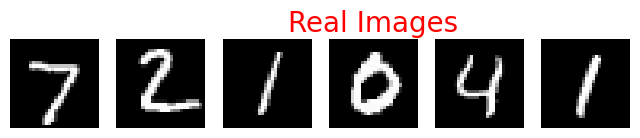

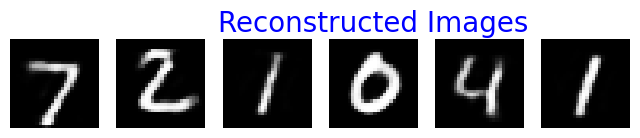

In [80]:
# Real image
n = 6
reconstructed_images = shallow_autoencoder.predict(test_images)

plt.figure(figsize=(8, 5))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  if(i == 3):
        plt.title('Real Images', fontsize = 20, color = 'Red')
  plt.imshow(test_images[i].reshape(28, 28))
  ax.axis('off')
plt.show()

# Testing the model by reconstructing image

plt.figure(figsize=(8, 5))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  if(i == 3):
        plt.title('Reconstructed Images', fontsize = 20, color = 'Blue')
  plt.imshow(reconstructed_images[i].reshape(28, 28))
  ax.axis('off')

plt.show()